In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
## import cleaned injury data set
Cleaned_Injury_Dataset = pd.read_csv("Cleaned_Injury_Dataset4.csv")
Cleaned_Injury_Dataset.head()

,Unnamed: 0,Year,Player,Pos,G,MP,PER,Team,Notes,index,...,Foot,Hip,Knee,Finger,Shoulder,Back,Achilles,Hamstring,Other,Type
0,75.0,2012.0,Al Horford,C,11.0,348.0,19.0,Hawks,surgery to repair torn left pectoral muscle (o...,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Other
1,189.0,2015.0,Al Jefferson,C,65.0,1992.0,19.7,Hornets,sore right knee (out for season),8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Knee
2,136.0,2014.0,Alec Burks,SG,78.0,2193.0,15.8,Jazz,placed on IL with left shoulder injury (out fo...,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Shoulder
3,197.0,2015.0,Alex Len,C,69.0,1518.0,13.5,Suns,fractured nose (out for season),8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Knee
4,139.0,2014.0,Allen Crabbe,SG,15.0,100.0,7.7,Blazers,placed on IL (out for season),7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Knee


In [3]:
Cleaned_Injury_Dataset.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'G', 'MP', 'PER', 'Team',
       'Notes', 'index', 'Height', 'Weight', 'Age', 'Draft_year',
       'Prev_Avg_EFF', 'After_Avg_EFF', 'Ankle ', 'Foot', 'Hip ', 'Knee',
       'Finger', 'Shoulder', 'Back', 'Achilles', 'Hamstring', 'Other',
       'Type '],
      dtype='object')

In [4]:

Cleaned_Injury_Dataset[Cleaned_Injury_Dataset.Pos.isin(["C","SF","PF","SG","PG"])]

,Unnamed: 0,Year,Player,Pos,G,MP,PER,Team,Notes,index,...,Foot,Hip,Knee,Finger,Shoulder,Back,Achilles,Hamstring,Other,Type
0,75.0,2012.0,Al Horford,C,11.0,348.0,19.0,Hawks,surgery to repair torn left pectoral muscle (o...,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Other
1,189.0,2015.0,Al Jefferson,C,65.0,1992.0,19.7,Hornets,sore right knee (out for season),8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Knee
2,136.0,2014.0,Alec Burks,SG,78.0,2193.0,15.8,Jazz,placed on IL with left shoulder injury (out fo...,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Shoulder
3,197.0,2015.0,Alex Len,C,69.0,1518.0,13.5,Suns,fractured nose (out for season),8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Knee
4,139.0,2014.0,Allen Crabbe,SG,15.0,100.0,7.7,Blazers,placed on IL (out for season),7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Knee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,262.0,2016.0,Victor Oladipo,SG,72.0,2379.0,16.7,Magic,placed on IL with concussion (out for season),9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Other
188,65.0,2012.0,Wilson Chandler,SF,8.0,215.0,9.0,Nuggets,placed on IL with groin injury (out for season),5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Other
189,27.0,2011.0,Xavier Henry,SG,38.0,527.0,7.0,Grizzlies,placed on IL with sprained right knee (out for...,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Knee
190,288.0,2017.0,Zach LaVine,SG,47.0,1749.0,14.6,Timberwolves,torn ACL in left knee (out for season),10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Knee


In [5]:
## creating a column for EFF Difference
Cleaned_Injury_Dataset["EFF_Diff"]= (Cleaned_Injury_Dataset["After_Avg_EFF"]-Cleaned_Injury_Dataset["Prev_Avg_EFF"])

In [6]:
Cleaned_Injury_Dataset.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'G', 'MP', 'PER', 'Team',
       'Notes', 'index', 'Height', 'Weight', 'Age', 'Draft_year',
       'Prev_Avg_EFF', 'After_Avg_EFF', 'Ankle ', 'Foot', 'Hip ', 'Knee',
       'Finger', 'Shoulder', 'Back', 'Achilles', 'Hamstring', 'Other', 'Type ',
       'EFF_Diff'],
      dtype='object')

In [7]:
## Split age to Age Groups with pd.cut
bins= [20,25,30,35,100]
labels = ['20-25','25-30','30-35','35 and above']
Cleaned_Injury_Dataset['AgeGroup'] = pd.cut(Cleaned_Injury_Dataset['Age'], bins=bins, labels=labels, right=False)
print(Cleaned_Injury_Dataset.head())

   Unnamed: 0    Year        Player Pos     G      MP   PER     Team  \
0        75.0  2012.0    Al Horford   C  11.0   348.0  19.0    Hawks   
1       189.0  2015.0  Al Jefferson   C  65.0  1992.0  19.7  Hornets   
2       136.0  2014.0    Alec Burks  SG  78.0  2193.0  15.8     Jazz   
3       197.0  2015.0      Alex Len   C  69.0  1518.0  13.5     Suns   
4       139.0  2014.0  Allen Crabbe  SG  15.0   100.0   7.7  Blazers   

                                               Notes  index  ...  Knee  \
0  surgery to repair torn left pectoral muscle (o...    5.0  ...   0.0   
1                   sore right knee (out for season)    8.0  ...   1.0   
2  placed on IL with left shoulder injury (out fo...    7.0  ...   0.0   
3                    fractured nose (out for season)    8.0  ...   1.0   
4                      placed on IL (out for season)    7.0  ...   1.0   

   Finger  Shoulder Back  Achilles  Hamstring  Other     Type   EFF_Diff  \
0     0.0       0.0  0.0       0.0        0.0 

In [8]:
## Split age to Weight Groups with pd.cut
bins= [76,93,102,109,132]
labels = ['76-93','93-102','102-109','109-132']
Cleaned_Injury_Dataset['WeightGroup'] = pd.cut(Cleaned_Injury_Dataset['Weight'], bins=bins, labels=labels, right=False)
print(Cleaned_Injury_Dataset.head())
Cleaned_Injury_Dataset.columns

   Unnamed: 0    Year        Player Pos     G      MP   PER     Team  \
0        75.0  2012.0    Al Horford   C  11.0   348.0  19.0    Hawks   
1       189.0  2015.0  Al Jefferson   C  65.0  1992.0  19.7  Hornets   
2       136.0  2014.0    Alec Burks  SG  78.0  2193.0  15.8     Jazz   
3       197.0  2015.0      Alex Len   C  69.0  1518.0  13.5     Suns   
4       139.0  2014.0  Allen Crabbe  SG  15.0   100.0   7.7  Blazers   

                                               Notes  index  ...  Finger  \
0  surgery to repair torn left pectoral muscle (o...    5.0  ...     0.0   
1                   sore right knee (out for season)    8.0  ...     0.0   
2  placed on IL with left shoulder injury (out fo...    7.0  ...     0.0   
3                    fractured nose (out for season)    8.0  ...     0.0   
4                      placed on IL (out for season)    7.0  ...     0.0   

   Shoulder  Back Achilles  Hamstring  Other     Type   EFF_Diff  AgeGroup  \
0       0.0   0.0      0.0      

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'G', 'MP', 'PER', 'Team',
       'Notes', 'index', 'Height', 'Weight', 'Age', 'Draft_year',
       'Prev_Avg_EFF', 'After_Avg_EFF', 'Ankle ', 'Foot', 'Hip ', 'Knee',
       'Finger', 'Shoulder', 'Back', 'Achilles', 'Hamstring', 'Other', 'Type ',
       'EFF_Diff', 'AgeGroup', 'WeightGroup'],
      dtype='object')

In [9]:
## selecting columns that are more representative for the journal
Cleaned_Injury_Dataset=Cleaned_Injury_Dataset.iloc[:-1 , :]
Visuals = Cleaned_Injury_Dataset.drop(['Unnamed: 0',  'G', 'MP', 'PER', 
       'Notes', 'index', 'Draft_year',
        'Ankle ', 'Foot', 'Hip ', 'Knee',
       'Finger', 'Shoulder', 'Back', 'Achilles', 'Hamstring', 'Other', 
       ], axis = 1)
Visuals[['Year','Weight','Age','Prev_Avg_EFF','After_Avg_EFF','EFF_Diff']].round()
Visuals = Visuals.iloc[:-1,:]
Visuals.head()

,Year,Player,Pos,Team,Height,Weight,Age,Prev_Avg_EFF,After_Avg_EFF,Type,EFF_Diff,AgeGroup,WeightGroup
0,2012.0,Al Horford,C,Hawks,208.28,113.398000,26.0,16.4,22.6,Other,6.2,25-30,109-132
1,2015.0,Al Jefferson,C,Hornets,208.28,131.088088,30.0,23.1,9.4,Knee,-13.7,30-35,109-132
2,2014.0,Alec Burks,SG,Jazz,198.12,95.707912,22.0,5.9,10.4,Shoulder,4.5,20-25,93-102
3,2015.0,Alex Len,C,Suns,215.90,115.665960,22.0,11.4,11.9,Knee,0.5,20-25,109-132
4,2014.0,Allen Crabbe,SG,Blazers,198.12,95.254320,22.0,1.7,9.6,Knee,7.9,20-25,93-102


In [10]:
## Round the data to appropriate digits
def roundDigit(x):
    if type(x) == int or type(x) == float:
        return round(x, 2)
    else:
        return x
    
Visuals = Visuals.applymap(roundDigit)
Visuals['Year']  = Visuals['Year'].apply(lambda x: int(x))
Visuals['Age']  = Visuals['Age'].apply(lambda x: int(x))
Visuals

,Year,Player,Pos,Team,Height,Weight,Age,Prev_Avg_EFF,After_Avg_EFF,Type,EFF_Diff,AgeGroup,WeightGroup
0,2012,Al Horford,C,Hawks,208.28,113.40,26,16.4,22.6,Other,6.2,25-30,109-132
1,2015,Al Jefferson,C,Hornets,208.28,131.09,30,23.1,9.4,Knee,-13.7,30-35,109-132
2,2014,Alec Burks,SG,Jazz,198.12,95.71,22,5.9,10.4,Shoulder,4.5,20-25,93-102
3,2015,Alex Len,C,Suns,215.90,115.67,22,11.4,11.9,Knee,0.5,20-25,109-132
4,2014,Allen Crabbe,SG,Blazers,198.12,95.25,22,1.7,9.6,Knee,7.9,20-25,93-102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2016,Victor Oladipo,SG,Magic,193.04,95.25,24,13.2,22.5,Other,9.3,20-25,93-102
188,2012,Wilson Chandler,SF,Nuggets,203.20,102.06,25,7.5,12.4,Other,4.9,25-30,102-109
189,2011,Xavier Henry,SG,Grizzlies,198.12,99.79,20,2.9,3.3,Knee,0.4,20-25,93-102
190,2017,Zach LaVine,SG,Timberwolves,195.58,83.91,22,9.3,20.3,Knee,11.0,20-25,76-93


In [11]:
##Create more visually aesthetic data frame for the journal
gmap = np.array([[1,2,3,4,5,6], [2,3,4,5,6,7], [3,4,5,6,7,8],[4,5,6,7,8,9],[5,6,7,8,9,10]])
Visuals.head().style.background_gradient(axis=None, gmap=gmap, cmap='YlOrRd', subset=[ 'Player', 'Team','Weight','Prev_Avg_EFF', 'Type ','AgeGroup']
)  

,Year,Player,Pos,Team,Height,Weight,Age,Prev_Avg_EFF,After_Avg_EFF,Type,EFF_Diff,AgeGroup,WeightGroup
0,2012,Al Horford,C,Hawks,208.280000,113.400000,26,16.400000,22.600000,Other,6.200000,25-30,109-132
1,2015,Al Jefferson,C,Hornets,208.280000,131.090000,30,23.100000,9.400000,Knee,-13.700000,30-35,109-132
2,2014,Alec Burks,SG,Jazz,198.120000,95.710000,22,5.900000,10.400000,Shoulder,4.500000,20-25,93-102
3,2015,Alex Len,C,Suns,215.900000,115.670000,22,11.400000,11.900000,Knee,0.500000,20-25,109-132
4,2014,Allen Crabbe,SG,Blazers,198.120000,95.250000,22,1.700000,9.600000,Knee,7.900000,20-25,93-102


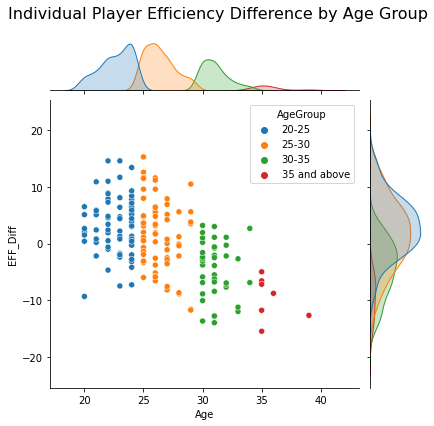

In [12]:
#plots
sns.jointplot(data=Cleaned_Injury_Dataset, x="Age", y="EFF_Diff", hue = "AgeGroup")
plt.subplots_adjust(top=0.9)
plt.suptitle('Individual Player Efficiency Difference by Age Group', fontsize = 16)
plt.show()

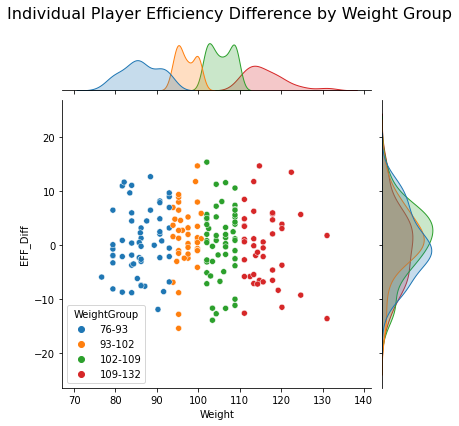

In [13]:
#plots
sns.jointplot(data=Cleaned_Injury_Dataset, x="Weight", y="EFF_Diff", hue = "WeightGroup")
plt.subplots_adjust(top=0.9)
plt.suptitle('Individual Player Efficiency Difference by Weight Group', fontsize = 16)
plt.show()

/Users/Chenjunyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


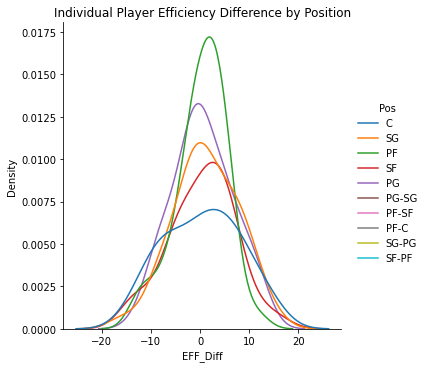

In [14]:
#plots
sns.displot(data=Cleaned_Injury_Dataset, x="EFF_Diff", hue="Pos", kind="kde")
plt.title("Individual Player Efficiency Difference by Position")
plt.show()

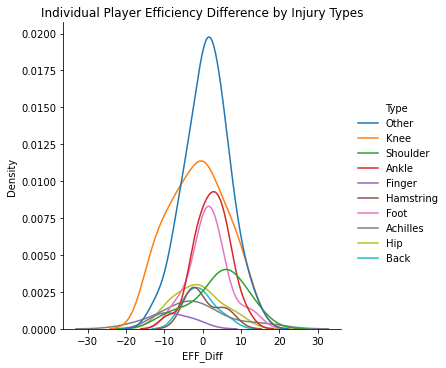

In [15]:
#plots
sns.displot(data=Cleaned_Injury_Dataset, x="EFF_Diff", hue="Type ", kind="kde")
plt.title("Individual Player Efficiency Difference by Injury Types")
plt.show()

In [16]:
#Zion's 2020-2021 season data for model input
Zion_Data = {'Name':['Zion'],
             'Height': ['200.66cm'], 
             'Weight': ['128.82kg'], 
             'Age at the time of injury': ['20'],
             'Previous EFF': ['27.4'],
             'Injury Type': ['Foot'],
             'Position': ['power forward']}

In [17]:
pd.DataFrame(Zion_Data)

,Name,Height,Weight,Age at the time of injury,Previous EFF,Injury Type,Position
0,Zion,200.66cm,128.82kg,20,27.4,Foot,power forward
